In [34]:
import readfargo as fg
import numpy as pl
import numpy as np
import matplotlib.pyplot as plt

path = './bae2017_01mth/'
path2 = './bae2017_01mthhalfzones//'
path3 = './bae2017_01mthquarterzones//'
path4 = './bae2017_01mtheighthzones/'
nstart = 5
itime = nstart
r0 = 1.0
fargo1    = fg.frame(nstart,rho=True,vphi=True,vr=True,vtheta=False,dir=path)
fargo_init    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=False,dir=path)
fargo_half = fargo    = fg.frame(nstart,rho=True,vphi=True,vr=True,vtheta=False,dir=path2)
fargo_halfinit    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=False,dir=path2)
fargo_quart    = fg.frame(nstart,rho=True,vphi=True,vr=True,vtheta=False,dir=path3)
fargo_quartinit    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=False,dir=path3)
fargo_eight    = fg.frame(nstart,rho=True,vphi=True,vr=True,vtheta=False,dir=path4)
fargo_eightinit    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=False,dir=path4)


phi = np.loadtxt(path +'domain_x.dat')
rad1  = np.loadtxt(path +'domain_y.dat')[3:-3]

phi   = 0.5*(phi[:-1] + phi[1:]) #what does this mean?                                                                                                                  \     $

rad1   = 0.5*(rad1[:-1] + rad1[1:])

phi2d, rad2d = np.meshgrid(phi, rad1) #explain meshgrid?                                                                                                                 \     $


X = rad2d*np.cos(phi2d)
Y = rad2d*np.sin(phi2d)

nx = len(phi)
ny = len(rad1)

nf = nstart
print(nf*20)
#-------------------------normal------------------
rho_init   = pl.fromfile(path +'gasdens0.dat').reshape(ny,nx)
rho   = pl.fromfile(path+'gasdens' + str(nf) + '.dat').reshape(ny,nx)
vphi_init   = pl.fromfile(path + 'gasvx0.dat').reshape(ny,nx)
vphi   = pl.fromfile(path+'gasvx' + str(nf) + '.dat').reshape(ny,nx)
vrad     = pl.fromfile(path+'gasvy' + str(nf) + '.dat').reshape(ny,nx)
vrad_init = pl.fromfile(path+'gasvy0.dat').reshape(ny,nx)
omegap = np.loadtxt(path+'planet0.dat')[itime][-1]
vphi += omegap*rad2d
omegapinit = np.loadtxt(path+'planet0.dat')[0][-1]
vphi_init += omegapinit*rad2d
vmin = -.015
vmax = .015
levels = np.linspace(vmin,vmax,64)


dphi = np.abs(fargo.phi[0]-fargo.phi[1])

pv = ((rad2d*vphi)[1:,:]-(rad2d*vphi)[:-1,:])/(rad2d[1:]-rad2d[:-1])
pv = pv[:,:-1]
pv -= ((vrad[:,1:]-vrad[:,:-1])/dphi)[1:,:]
pv /= rad2d[:-1,:-1]
pv /= rho[:-1,:-1]
pv_original = pv

pv_init = ((rad2d*vphi_init)[1:,:]-(rad2d*vphi_init)[:-1,:])/(rad2d[1:]-rad2d[:-1]) 
pv_init = pv_init[:,:-1]
pv_init -= ((vrad_init[:,1:]-vrad_init[:,:-1])/dphi)[1:,:]
pv_init /= rad2d[:-1,:-1]
pv_init /= rho_init[:-1,:-1]
pv_original_init = pv_init
#-------------------------------------------
#fig, ax = plt.subplots(figsize=(8,8))
#ax.contourf(fargo.r[1:], fargo.phi[1:]*180/np.pi, ((pv-pv_init)/pv_init).T, levels=levels)
#ax.set_xlim(0.3,1.5)
#ax.set_xlabel('r [au]')
#ax.set_ylabel('phi [degrees]')
#ax.set_title(f'time ='+ str(nf*20) +' orbits, 700x256 zones')
#plt.savefig('PV_imageeighthzones.png',dpi = 300)


100


ValueError: x and y must have same first dimension, but have shapes (1023,) and (2047,)

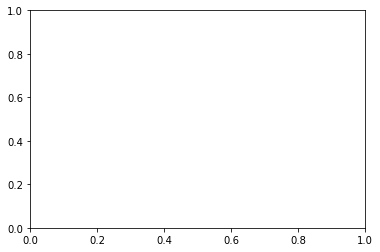

In [35]:
pv2d = pv.mean(axis=1)
pv_init2d = pv_init.mean(axis=1)

plt.plot(fargo.r[1:],(pv2d-pv_init2d)/pv_init2d)#.mean(axis=1))
plt.xlabel('radius (au)')
plt.ylabel('PV')
plt.xlim(0.3, 1.5)
plt.title('PV versus Radius, 100 orbits, 700x256 zones')
plt.savefig('PV_2D_eighthzones',dpi=300)

#plt.plot(fargo.r[:],pv_init)
print(((rad2d*vphi)[1:,:]-(rad2d*vphi)[:-1,:]).shape)#
print((rad2d[1:]-rad2d[:-1]).shape )
print(((vrad[1:]-vrad[:-1])/dphi)[:,:])
print(fargo_init.vr)

In [36]:
#print(vrad[:,1:]-vrad[:,:-1])
#print((vrad[:,1:]))#-vrad_init[:,:-1]))#/dphi)
pv = ((rad2d*vphi)[1:,:]-(rad2d*vphi)[:-1,:])/(rad2d[1:]-rad2d[:-1])
pv = pv[:,:-1]
pv -= ((vrad[:,1:]-vrad[:,:-1])/dphi)[1:,:]
print(pv)

[[1.11576327 1.11576327 1.11576328 ... 1.11576325 1.11576325 1.11576326]
 [1.11512901 1.11512901 1.11512902 ... 1.11512898 1.11512899 1.115129  ]
 [1.11449921 1.11449922 1.11449923 ... 1.11449919 1.11449919 1.1144992 ]
 ...
 [0.34894721 0.34894719 0.34894717 ... 0.34894729 0.34894727 0.34894725]
 [0.34874889 0.34874887 0.34874885 ... 0.34874897 0.34874895 0.34874893]
 [0.34866826 0.34866824 0.34866822 ... 0.34866833 0.34866831 0.34866829]]


In [31]:
phi = np.loadtxt(path2 +'domain_x.dat')
rad  = np.loadtxt(path2 +'domain_y.dat')[3:-3]
phi   = 0.5*(phi[:-1] + phi[1:])                                                                              
rad   = 0.5*(rad[:-1] + rad[1:])
phi2d, rad2d = np.meshgrid(phi, rad)
nx = len(phi)
ny = len(rad)
rho_init2   = pl.fromfile(path2 +'gasdens0.dat').reshape(ny,nx)
rho2   = pl.fromfile(path2+'gasdens' + str(nf) + '.dat').reshape(ny,nx)
vphi_init2   = pl.fromfile(path2 + 'gasvx0.dat').reshape(ny,nx)
vphi2   = pl.fromfile(path2+'gasvx' + str(nf) + '.dat').reshape(ny,nx)
vrad2     = pl.fromfile(path2+'gasvy' + str(nf) + '.dat').reshape(ny,nx)
vrad_init2 = pl.fromfile(path2+'gasvy0.dat').reshape(ny,nx)
omegap2 = np.loadtxt(path2+'planet0.dat')[itime][-1]
vphi2 += omegap2*rad2d
omegapinit2 = np.loadtxt(path2+'planet0.dat')[0][-1]
vphi_init2 += omegapinit2*rad2d

dphi = np.abs(fargo.phi[0]-fargo.phi[1])

pv2 = ((rad2d*vphi2)[1:,:]-(rad2d*vphi2)[:-1,:])/(rad2d[1:]-rad2d[:-1])
pv2 = pv2[:,:-1]
pv2 -= ((vrad2[:,1:]-vrad2[:,:-1])/dphi)[1:,:]
pv2 /= rad2d[:-1,:-1]
pv2 /= rho2[:-1,:-1]
pv_half = pv2

pv_init2 = ((rad2d*vphi_init2)[1:,:]-(rad2d*vphi_init2)[:-1,:])/(rad2d[1:]-rad2d[:-1]) 
pv_init2 = pv_init2[:,:-1]
pv_init2 -= ((vrad_init2[:,1:]-vrad_init2[:,:-1])/dphi)[1:,:]
pv_init2 /= rad2d[:-1,:-1]
pv_init2 /= rho_init2[:-1,:-1]
pv_half_init = pv_init2
#----------------
phi = np.loadtxt(path3 +'domain_x.dat')
rad  = np.loadtxt(path3 +'domain_y.dat')[3:-3]
phi   = 0.5*(phi[:-1] + phi[1:])                                                                              
rad   = 0.5*(rad[:-1] + rad[1:])
phi2d, rad2d = np.meshgrid(phi, rad)
nx = len(phi)
ny = len(rad)
rho_init3   = pl.fromfile(path3 +'gasdens0.dat').reshape(ny,nx)
rho3   = pl.fromfile(path3+'gasdens' + str(nf) + '.dat').reshape(ny,nx)
vphi_init3   = pl.fromfile(path3 + 'gasvx0.dat').reshape(ny,nx)
vphi3   = pl.fromfile(path3+'gasvx' + str(nf) + '.dat').reshape(ny,nx)
vrad3     = pl.fromfile(path3+'gasvy' + str(nf) + '.dat').reshape(ny,nx)
vrad_init3 = pl.fromfile(path3+'gasvy0.dat').reshape(ny,nx)
omegap3 = np.loadtxt(path3+'planet0.dat')[itime][-1]
vphi3 += omegap3*rad2d
omegapinit3 = np.loadtxt(path3+'planet0.dat')[0][-1]
vphi_init3 += omegapinit3*rad2d

dphi = np.abs(fargo.phi[0]-fargo.phi[1])

pv3 = ((rad2d*vphi3)[1:,:]-(rad2d*vphi3)[:-1,:])/(rad2d[1:]-rad2d[:-1])
pv3 = pv3[:,:-1]
pv3 -= ((vrad3[:,1:]-vrad3[:,:-1])/dphi)[1:,:]
pv3 /= rad2d[:-1,:-1]
pv3 /= rho3[:-1,:-1]
pv_quarter = pv3

pv_init3 = ((rad2d*vphi_init3)[1:,:]-(rad2d*vphi_init3)[:-1,:])/(rad2d[1:]-rad2d[:-1]) 
pv_init3 = pv_init3[:,:-1]
pv_init3 -= ((vrad_init3[:,1:]-vrad_init3[:,:-1])/dphi)[1:,:]
pv_init3 /= rad2d[:-1,:-1]
pv_init3 /= rho_init3[:-1,:-1]
pv_quarter_init = pv_init3
#---------------
phi = np.loadtxt(path4 +'domain_x.dat')
rad  = np.loadtxt(path4 +'domain_y.dat')[3:-3]
phi   = 0.5*(phi[:-1] + phi[1:])                                                                              
rad   = 0.5*(rad[:-1] + rad[1:])
phi2d, rad2d = np.meshgrid(phi, rad)
nx = len(phi)
ny = len(rad)
rho_init4   = pl.fromfile(path4 +'gasdens0.dat').reshape(ny,nx)
rho4   = pl.fromfile(path4+'gasdens' + str(nf) + '.dat').reshape(ny,nx)
vphi_init4   = pl.fromfile(path4 + 'gasvx0.dat').reshape(ny,nx)
vphi4   = pl.fromfile(path4+'gasvx' + str(nf) + '.dat').reshape(ny,nx)
vrad4     = pl.fromfile(path4+'gasvy' + str(nf) + '.dat').reshape(ny,nx)
vrad_init4 = pl.fromfile(path4+'gasvy0.dat').reshape(ny,nx)
omegap4 = np.loadtxt(path4+'planet0.dat')[itime][-1]
vphi4 += omegap4*rad2d
omegapinit4 = np.loadtxt(path4+'planet0.dat')[0][-1]
vphi_init4 += omegapinit4*rad2d

dphi = np.abs(fargo.phi[0]-fargo.phi[1])

pv4 = ((rad2d*vphi4)[1:,:]-(rad2d*vphi4)[:-1,:])/(rad2d[1:]-rad2d[:-1])
pv4 = pv4[:,:-1]
pv4 -= ((vrad4[:,1:]-vrad4[:,:-1])/dphi)[1:,:]
pv4 /= rad2d[:-1,:-1]
pv4 /= rho4[:-1,:-1]
pv_eighth = pv4

pv_init4 = ((rad2d*vphi_init4)[1:,:]-(rad2d*vphi_init4)[:-1,:])/(rad2d[1:]-rad2d[:-1]) 
pv_init4 = pv_init4[:,:-1]
pv_init4 -= ((vrad_init4[:,1:]-vrad_init4[:,:-1])/dphi)[1:,:]
pv_init4 /= rad2d[:-1,:-1]
pv_init4 /= rho_init4[:-1,:-1]
pv_eighth_init = pv_init4

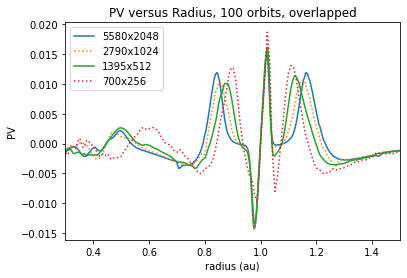

In [42]:
pv2dorig = pv_original.mean(axis=1)
pv_init2dorig = pv_original_init.mean(axis=1)
pv2dhalf = pv_half.mean(axis=1)
pv_init2dhalf = pv_half_init.mean(axis=1)
pv2dquart = pv_quarter.mean(axis=1)
pv_init2dquart = pv_quarter_init.mean(axis=1)
pv2deight = pv_eighth.mean(axis=1)
pv_init2deight = pv_eighth_init.mean(axis=1)

plt.plot(rad1[1:],(pv2dorig-pv_init2dorig)/pv_init2dorig, label = '5580x2048')
plt.plot(fargo_half.r[1:],(pv2dhalf-pv_init2dhalf)/pv_init2dhalf, label = '2790x1024',linestyle='dotted')
plt.plot(fargo_quart.r[1:],(pv2dquart-pv_init2dquart)/pv_init2dquart, label = '1395x512')
plt.plot(fargo_eight.r[1:],(pv2deight-pv_init2deight)/pv_init2deight, label = '700x256',linestyle='dotted')
plt.xlabel('radius (au)')
plt.ylabel('PV')
plt.xlim(0.3, 1.5)
plt.title('PV versus Radius, 100 orbits, overlapped')
plt.legend()
plt.savefig('PV_2D_allzones',dpi=300)